# Mask grids with shapefiles

In [3]:
%%capture 
%load_ext autoreload
%autoreload 2

from antarctic_plots import maps, fetch, utils
import pyogrio

makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)


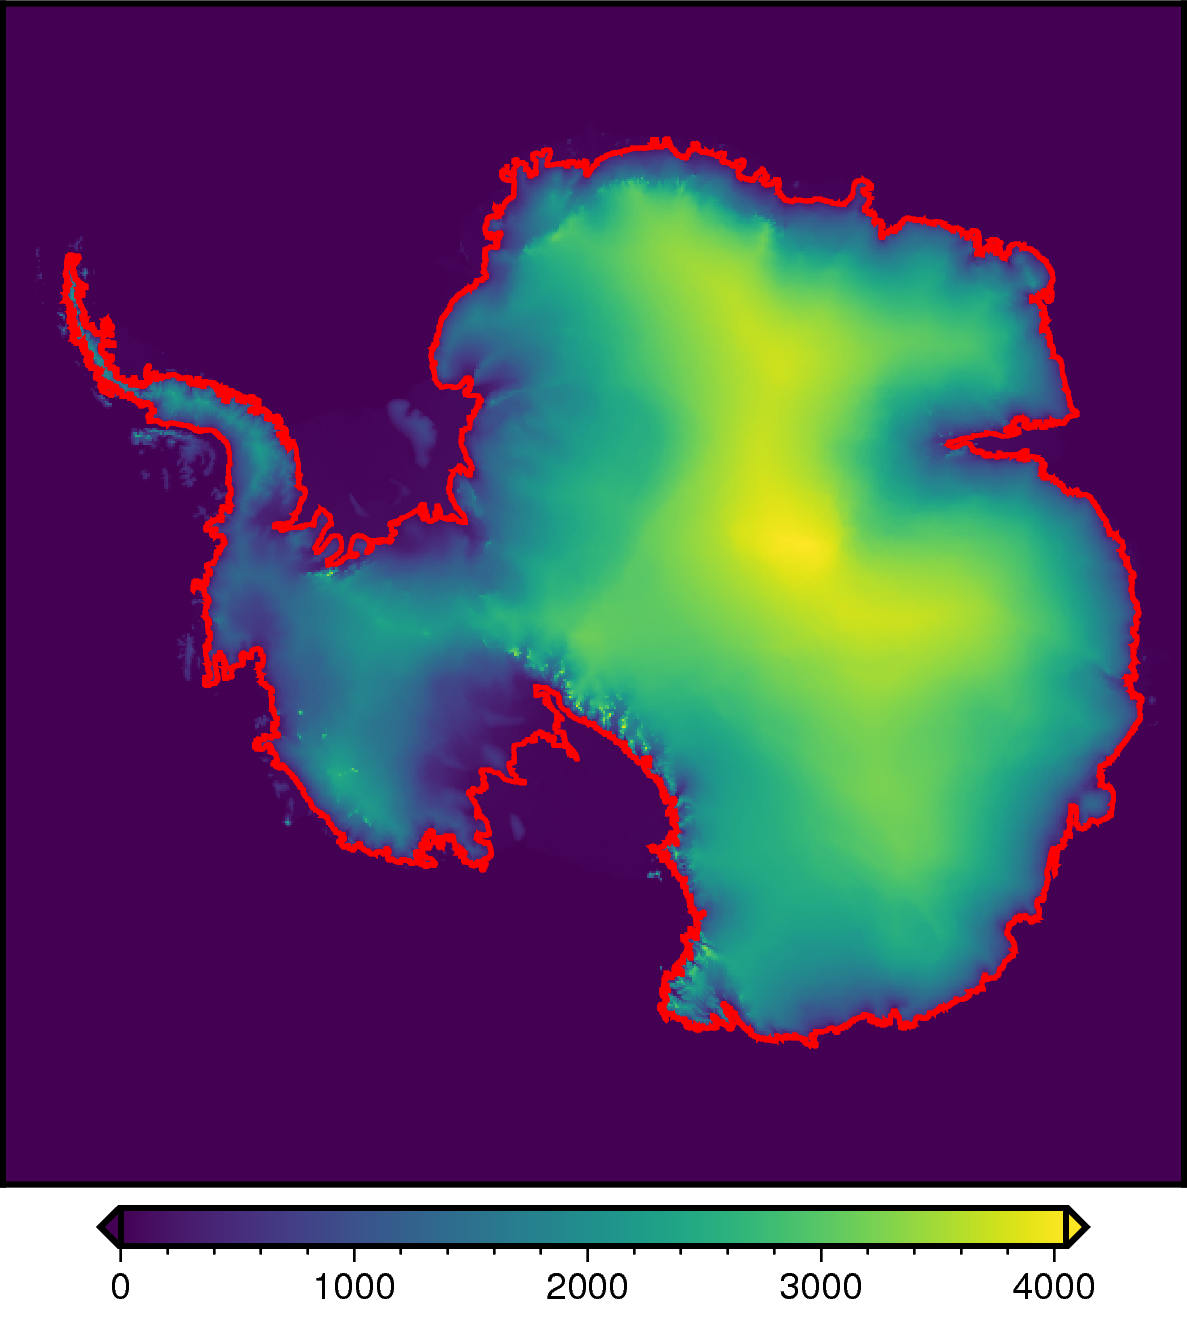

In [5]:
# fetch a grid
grid = fetch.bedmachine(layer='surface')

# utils.get_grid_info(grid)

# fetch a shapefile
shape = fetch.groundingline()

# get just the grounding line
gdf = pyogrio.read_dataframe(shape)
groundingline = gdf[gdf.Id_text == "Grounded ice or land"]

# plot the grid
fig = maps.plot_grd(grid)

# plot the shapefile
fig.plot(groundingline, pen='1p,red')

# show the plot
fig.show()

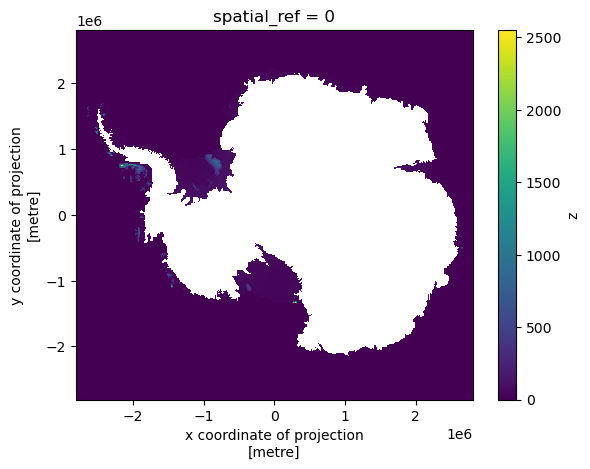

In [6]:
# mask the inside region
masked_inside = utils.mask_from_shp(
    shapefile=groundingline, xr_grid=grid, masked=True)

masked_inside.plot()


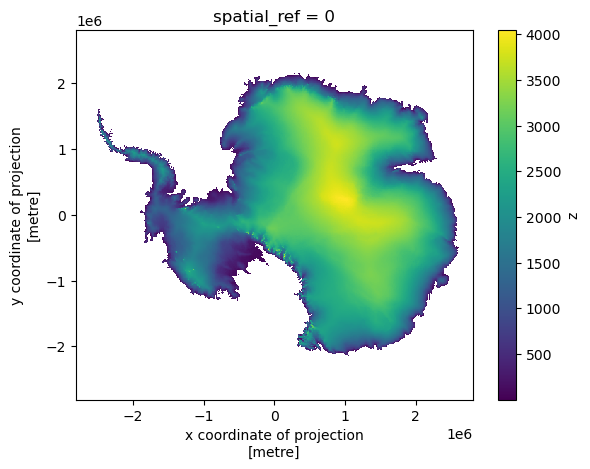

In [7]:
# mask the outside region
masked_outside = utils.mask_from_shp(
    shapefile=groundingline, xr_grid=grid, masked=True, invert=False)

masked_outside.plot()